In [1]:
import fdsreader
import matplotlib.pyplot as plt
import numpy as np

# Set the matplotlib output to svg
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import os
# check for set environment variable JB_NOSHOW
show = True
if 'JB_NOSHOW' in os.environ:
    show = False

# Modelling

## General Idea

Particles are used to represent
* object smaller than the grid spacing
* liquid and solid fuel particles
* water droplets
* massless tracer particles

As it is not possible to modell each individual particle, the particle ensemble is modelled as Lagrangian particles. This concept is based on the following assumptions
* definition of representative particles,
* each of the Lagrangian particles represents a set of physical particles with its properties, like the diameter spectrum, and
* interaction of the particles with the fluid and other particles.

## Transport Equations

As a particle moves in a fluid, it transfers momentum to a fluid element

$$
\mf f_b = \frac{1}{V_{cell}} \sum_{p \in cell}\left(\frac{\rho}{2} C_d A_{p,c} (\vec{v}_p - \vec{v})|\vec{v}_p - \vec{v}| - \frac{dm_p}{dt}(\vec{v}_p - \vec{v})\right)\quad ,
$$

with
* $\mf V_{cell}, \rho, \vec{v}$: gas phase properties
* $\mf \vec{v}_p, m_p, A_{p,c}$: particle properties
* $\mf C_d$: drag coefficient

The total particle acceleration for a single particle $\mf p$ is given by

$$
\mf \frac{du_p}{dt} = \vec{g} - \frac{1}{2}\frac{\rho C_dA_{p,c}}{m_p}( \vec{v}_p - \vec{v})|\vec{v}_p - \vec{v}|\quad ,
$$

and the particle position can be computed using the following equation

$$
\mf \frac{d\vec{x}_p}{dt} = \vec{u}_p\quad .
$$

The movement and momentum transfer of the particles depend on the drag coefficient $\mf C_d$, which can be computed as

$$
\mf C_d = \left\{ \begin{array}{lc} 
    \mf 24/Re_D & Re_D \lt 1 \\ 
    \mf 24 \cdot (0.85 + 0.15 Re_D ^{0.687}) / Re_D & 1 \lt Re_D \lt 1000 \\ 
    \mf 0.44 & 1000 \lt Re_D 
    \end{array} \right.
$$

Where the Reynolds number is given as

$$
\mf Re_D = \frac{\rho |\vec{v}_p - \vec{v}| 2 r_p}{\mu(T)}\quad ,
$$

with
* $\mf \rho, \vec{v}, \mu(T)$: gas properties
* $\mf \vec{v}_p, r_p$: particle properties

This formula is for spherical particles, formulas for other shapes are available.

## Example – Single Particle Trajectory

An input file for FDS, where a single particle is injected with a given initial position and velocity, is shown in the following listing.

```{literalinclude} ../../../../data/particles/single_particle/single_particle.fds
```

In the above example, a particle property (`PART`) is defined. It states, that the particle species is a water (`WATER VAPOR`) droplet with a diameter of $\mf 1~mm$ (`DIAMETER`). In general, a diameter spectrum is definied, thus the diameter statement represents just a property of the distribution function, as shown later. Here, the option `MONODISPERSE=.TRUE.` is used to generate particle with a single diameter. The `SAMPLING_FACTOR` controls how many particles should be written to the output file, where its value states that every nth particle is written out. Here, every particle is recorded.

The particle is injected using the `INIT` statement. It defines the positon (`XYZ`), the velocity (`UVW`) and the number of injected particles (`N_PARTICLES`) of the particle property (`PART_ID`).

### Task 1

Run a simulation with the above input file and visualise it with Smokeview.

### Task 2

Plot the elevation of the particle as a function of time and as a function of the projected (x-y-plane) distance to the initial position, like in {numref}`fig-particles-single-t-z` and {numref}`fig-particles-single-xy-z`.

In [2]:
sim = fdsreader.Simulation('../../../../data/particles/single_particle/rundir/')

In [3]:
part_pos = sim.particles[0].positions
part_time = sim.particles[0].times

In [4]:
px = []
py = []
pz = []
pt = []
for i in range(len(part_pos)):
    cpos = part_pos[i]
    if len(cpos) > 0:
        px.append(cpos[0,0])
        py.append(cpos[0,1])
        pz.append(cpos[0,2])
        pt.append(part_time[i])
px = np.array(px)
py = np.array(py)
pz = np.array(pz)
pt = np.array(pt)

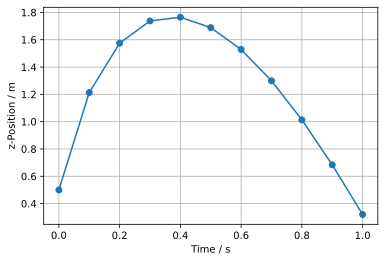

<Figure size 432x288 with 0 Axes>

In [5]:
plt.plot(pt, pz, '-o')
plt.xlabel('Time / s')
plt.ylabel('z-Position / m')

plt.grid()

plt.savefig('./figs/single_particle_time-zpos.svg')
if show: plt.show();
plt.clf();

:::{figure-md} fig-particles-single-t-z

<img src="./figs/single_particle_time-zpos.svg" width="80%">

Position of the partile as a function of time.
:::

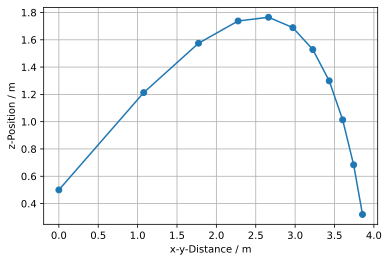

<Figure size 432x288 with 0 Axes>

In [6]:
plt.plot(np.sqrt(px**2 + py**2), pz, '-o')

plt.xlabel('x-y-Distance / m')
plt.ylabel('z-Position / m')

plt.grid()

plt.savefig('./figs/single_particle_z-xy.svg')
if show: plt.show();
plt.clf();

:::{figure-md} fig-particles-single-xy-z

<img src="./figs/single_particle_z-xy.svg" width="80%">

Trajectory of the particle.
:::

### Task 3

Instead of a single particle, adopt the input file to insert three particles. They should differ in diameter, e.g. $\mf 10~mm$, $\mf 1~mm$, and $\mf 100~\mu m$, as well as their injection time. Chose an injection time with a separation of one second.

Plot their trajectories.

In [7]:
sim = fdsreader.Simulation('../../../../data/particles/three_particles/rundir/')

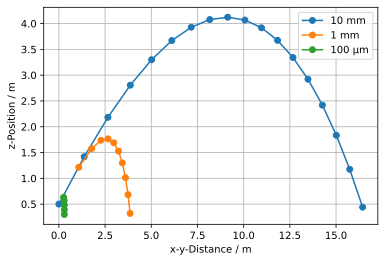

<Figure size 432x288 with 0 Axes>

In [8]:
labels=['$\sf 10~mm$', '$\sf 1~mm$', '$\sf 100~\mu m$']
for i in range(3):
    part_pos = sim.particles[i].positions
    part_time = sim.particles[i].times

    px = []
    py = []
    pz = []
    for cpos in part_pos:
        if len(cpos) > 0:
            px.append(cpos[0,0])
            py.append(cpos[0,1])
            pz.append(cpos[0,2])
    px = np.array(px)
    py = np.array(py)
    pz = np.array(pz)
    
    plt.plot(np.sqrt(px**2 + py**2), pz, '-o', label=labels[i])

plt.xlabel('x-y-Distance / m')
plt.ylabel('z-Position / m')

plt.legend()
plt.grid()

plt.savefig('./figs/three_particles.svg')
if show: plt.show();
plt.clf();

:::{figure-md} fig-particles-three-xy-z

<img src="./figs/three_particles.svg" width="80%">

Trajectory of three particles with different diameters.
:::

## Example – Heat and Mass Transfer

Particles are in thermal interaction with the fluid and vice versa. Liquid particles can evaporate gas if the according conditions, temperature and partial pressure, are met.

The following example illustrates the evaporation of a water droplet in a warm surrounding.

```{literalinclude} ../../../../data/particles/mass_heat_transfer/particle_evaporation_template.fds
```

In [9]:
sim = fdsreader.Simulation('../../../../data/particles/mass_heat_transfer/')

In [10]:
part = sim.particles[0]
part_diam = []
part_mass = []
part_temp = []
part_time = []

nt = len(part.times)
for it in range(nt):
    pd = part.data['PARTICLE DIAMETER'][it]
    if len(pd) > 0:
        part_diam.append(part.data['PARTICLE DIAMETER'][it][0])
        part_mass.append(part.data['PARTICLE MASS'][it][0])
        part_temp.append(part.data['PARTICLE TEMPERATURE'][it][0])
        part_time.append(part.times[it])
part_diam = np.array(part_diam)
part_mass = np.array(part_mass)
part_temp = np.array(part_temp)
part_time = np.array(part_time)

In [11]:
gas_mass = sim.devices['WATER_VAPOR_MASS'].data
gas_time = sim.devices['Time'].data

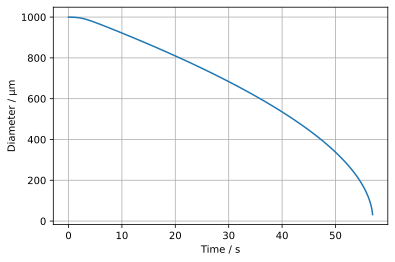

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(part_time, part_diam)
plt.xlabel('Time / s')
plt.ylabel('Diameter / $\sf \mu m$')
plt.grid()


plt.savefig('./figs/mht_diameter.svg')
if show: plt.show();
plt.clf();

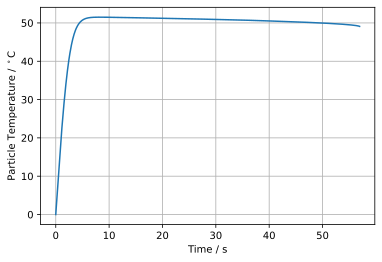

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(part_time, part_temp)
plt.xlabel('Time / s')
plt.ylabel('Particle Temperature / $\sf ^\circ C$')
plt.grid()

plt.savefig('./figs/mht_temperature.svg')
if show: plt.show();
plt.clf();

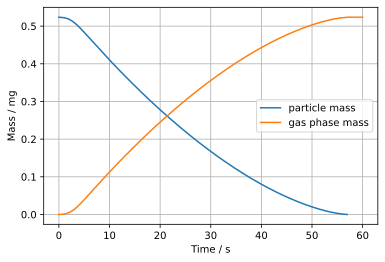

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(part_time, part_mass*1e6, label='particle mass')
plt.plot(gas_time, gas_mass*1e6, label='gas phase mass')

plt.xlabel('Time / s')
plt.ylabel('Mass / mg')

plt.grid()
plt.legend()

plt.savefig('./figs/mht_water_mass.svg')
if show: plt.show();
plt.clf();

### Task 1

Run the input file and observe the reduction of the particle diameter. Particles can be colored in Smokeview. The quantity used for coloring can be selected under `Show/Hide – Particles`.

### Task 2

Add a slice file for the water vapour density in the gas phase.

:::{figure-md} fig-particles-mht_smv_screenshot

<img src="./figs/mht_smv_screenshot.png" width="80%">

Slice with the species concentration.
:::

### Task 3

Add the needed output data to plot the particle diameter and temperature as a function of time.

:::{figure-md} fig-particles-mht_diameter

<img src="./figs/mht_diameter.svg" width="80%">

Particle diameter as a function of time.
:::

:::{figure-md} fig-particles-mht_temperature

<img src="./figs/mht_temperature.svg" width="80%">

Particle temperature as a function of time.
:::

### Task 4

Extend the input file by a device, which computes the volume integral of the water vapour density and compare the mass of the particle and the mass of water vapour in the domain as a function of time.

:::{figure-md} fig-particles-mht_water_mass

<img src="./figs/mht_water_mass.svg" width="80%">

Mass exchange between the evaporating particle and the gas phase.
:::

## Particle-Particle Interaction

In cases where the particle density is high, particles start to interact with each other. Either directly via collisions or indirectly via a fluid interaction. The particle-fluid-particle interaction can lead to the reduction of the drag coefficient.
This effect starts at the distance of the particles drops below 10 particle diameters of a volume fraction of about $\mf \alpha = 0.01$.

The fraction of the reduced drag coefficient of the tailing particle w.r.t. the isolated one can be expressed with the ratio of the hydrodynamic forces.

$$
\mf C_D = C_{D,0} \frac{F}{F_0}
$$

where the index 0 indicated the single isolated particle. The forces are defined using the wake velocity $\mf W$

$$
\mf W = 1 - \frac{C_{D,0}}{2}\left( 1 - \exp\left( -\frac{Re}{16 (L/D - 1/2)} \right)  \right)
$$

with $\mf L$ as the distance between the particles, $\mf D$ the particle diameter and $\mf L/D$ the separation distance.

The resulting force ratio is a complex function of $\mf W, Re, L/D$. Using the local volume fraction, the separation distance can be estimated as

$$
\mf \frac{L}{D} = \tilde{D} \left(\frac{\pi}{6\alpha}\right)^{\frac{1}{3}}
$$

where $\mf \tilde{D}$ is the local average particle diameter. This approach to estimate the reduction has limitations and significantly under-estimates the numbers as at short distances the wake field is not well developed.

## Droplet Sizes and Weighting

In general, the size of the particles depends on the creation process. In case of sprinkler, this may be impacted by the the nozzle diameter and geometry as well as the operating pressure. The sprinkler pressure determines also the mass flow $\mf \dot{m}_p$ and the particle velocity $\mf \vec{v}_p$.

The diameters are rarely of same size, but are a spectrum, which can be described with a distribution function. FDS uses a combination of a log-normal and a Rosin-Rammler distribution function. The first one is used for small particles sizes, up to the median of the distribution function $\mf D_{v,0.5}$, and the second for larger particles. The cumulative size distribution is therefor

$$
\mf F_V(D) = \left\{ \begin{array}{lc} 
   \mf \frac{1}{2\pi} \int_0^D \frac{1}{\sigma D'} exp\left( - \frac{|ln(D'/D_{v,0.5}|^2}{2\sigma^2}\right)\ dD' 
       & \mf D \lt D_{v,0.5} \\ 
    \mf 1-exp\left(-0.693\cdot \left(\frac{D}{D_{v,0.5}}\right)^\gamma\right) 
       & \mf D \gt D_{v,0.5} \end{array} \right.
$$

with the parameters $\mf \gamma = 2.4$ and $\mf \sigma=0.48$.

:::{figure-md} fig-particles-distribution

<img src="./figs/particle_diameter_CDF.png" width="80%">

Cumulative distribution function of the particle diameters. Source: {cite}`FDS-UG-6.7.5`.
:::


A Lagrangian particle represents a set of physical particles. The weighting factor $\mf C$ indicates the scaling of the particles contribution to mass, momentum and heat transfer. The procedure used in FDS to compute the weighting factor is as follows:

1. define mass flow $\mf \dot{m}_p$, insertion time $\mf \delta t$ and the number of particles $\mf N$
1. divide diameter range in bins, default is 7
1. randomly distribute $\mf N$ on the bins
1. for each particle pick a random diameter from the corresponding bin
1. the particle's weighting factor $\mf C_i$ corresponds to the number of particles inside the bin
1. total weighting factor $\mf C$ is given by the mass balance

$$
\mf \dot{m}_p\delta t = C \sum_i^N C_i \frac{4}{3}\pi\rho_p\left(\frac{D_i}{2}\right)^3 \quad .
$$